# Inferential Statistics

By calculating descriptive statistics and plotting data visualizations, we may see differences in data observed in different conditions. However, before we conclude that there is a real difference, we must first consider the possibility that we are not observing true differences, but instead differences due to chance. We can test this possibility using inferential statistics.

In [1]:
import polars as pl
import pingouin as pg
study = pl.read_csv("../assignment9/study.csv", null_values="n/a")
study

participant_id,trial_type,item_type,response,response_time
i64,str,i64,i64,f64
1,"""target""",1,1,1.5
1,"""lure""",2,0,2.3
1,"""target""",2,1,1.7
1,"""target""",1,0,2.2
1,"""lure""",2,1,1.8
…,…,…,…,…
3,"""lure""",2,1,2.5
3,"""target""",2,1,1.6
3,"""lure""",2,0,2.8


In [2]:
df = (
    study.drop_nulls()
    .pivot("trial_type", index="participant_id", values="response_time", aggregate_function="mean")
)
df

participant_id,target,lure
i64,f64,f64
1,1.75,2.1
2,1.425,2.125
3,1.766667,2.525


In [3]:
pg.ttest(df["target"], df["lure"], paired=True)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-4.727456,2,two-sided,0.04195,"[-1.15, -0.05]",2.78068,2.839,0.693374


<Axes: xlabel='trial_type', ylabel='response_time'>

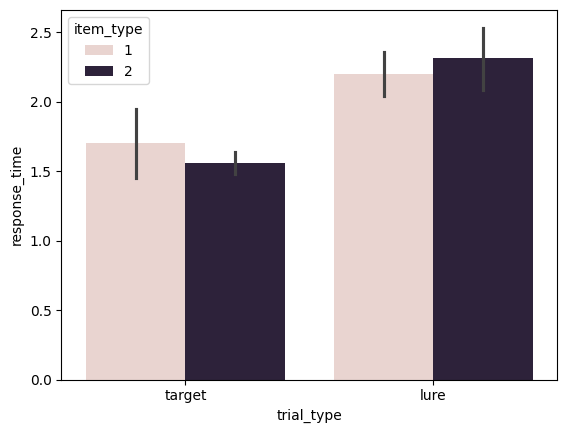

In [4]:
import seaborn as sns
sns.barplot(data=study, x="trial_type", y="response_time", hue="item_type")

In [5]:
pg.rm_anova(data=study.to_pandas(), dv="response_time", within=["trial_type", "item_type"], subject="participant_id")

/Users/nmorton/VSCode/datascipsych/venv/lib/python3.12/site-packages/pingouin/distribution.py:507: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  data.groupby(level=1, axis=1, observed=True, group_keys=False)
/Users/nmorton/VSCode/datascipsych/venv/lib/python3.12/site-packages/pingouin/distribution.py:508: FutureWarning: DataFrameGroupBy.diff with axis=1 is deprecated and will be removed in a future version. Operate on the un-grouped DataFrame instead
  .diff(axis=1)


,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,trial_type,1.171875,1,2,1.171875,23.734177,0.039645,0.039645,0.734622,1.0
1,item_type,0.000208,1,2,0.000208,0.007874,0.937378,0.937378,0.000492,1.0
2,trial_type * item_type,0.046875,1,2,0.046875,3.571429,0.199359,0.199359,0.099690,1.0
